In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Logistic Regression\bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


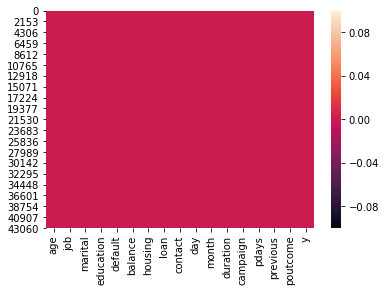

In [4]:
sns.heatmap(df.isnull())

In [5]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

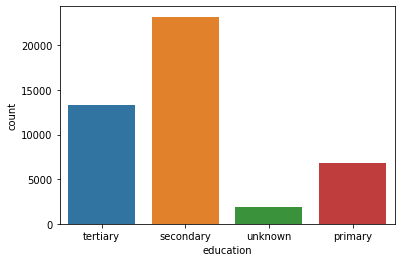

In [7]:
sns.countplot(x='education',data=df)

In [8]:
stats.mode(df['education'])

ModeResult(mode=array(['secondary'], dtype=object), count=array([23202]))

In [9]:
df.shape

(45211, 17)

In [10]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [11]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

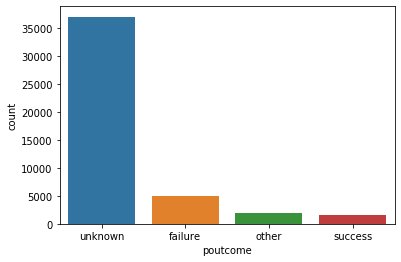

In [12]:
sns.countplot(x='poutcome',data=df)

In [13]:
df.drop(["job"],inplace=True,axis = 1)
df.drop(["contact"],inplace=True,axis = 1)
df.drop(["day"],inplace=True,axis = 1)
df.drop(["month"],inplace=True,axis = 1)
df.drop(["poutcome"],inplace=True,axis = 1)

In [14]:
df.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,single,unknown,no,1,no,no,198,1,-1,0,no


In [15]:
marital =['marital']
df = pd.get_dummies(df,columns=marital,drop_first=True)

In [16]:
education = ['education']
df = pd.get_dummies(df,columns=education,drop_first=True)

In [17]:
default = ['default']
df = pd.get_dummies(df,columns=default,drop_first=True)

In [18]:
housing = ['housing']
df = pd.get_dummies(df,columns=housing,drop_first=True)

In [19]:
loan = ['loan']
df = pd.get_dummies(df,columns=loan,drop_first=True)

In [20]:
y = ['y']
df = pd.get_dummies(df,columns=y,drop_first=True)

In [21]:
df.tail()

,age,balance,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
45206,51,825,977,3,-1,0,1,0,0,1,0,0,0,0,1
45207,71,1729,456,2,-1,0,0,0,0,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,1,0,1,0,0,0,0,0,1
45209,57,668,508,4,-1,0,1,0,1,0,0,0,0,0,0
45210,37,2971,361,2,188,11,1,0,1,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.columns
X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes']]
y = df['y_yes']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logmodel.predict(X_test)

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13175
           1       0.57      0.20      0.30      1745

    accuracy                           0.89     14920
   macro avg       0.74      0.59      0.62     14920
weighted avg       0.86      0.89      0.86     14920

